## Import Modules

In [26]:
import seaborn as sns
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

## Load Datasets

In [29]:
iris = sns.load_dataset('iris')

In [30]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploratory Data Analysis

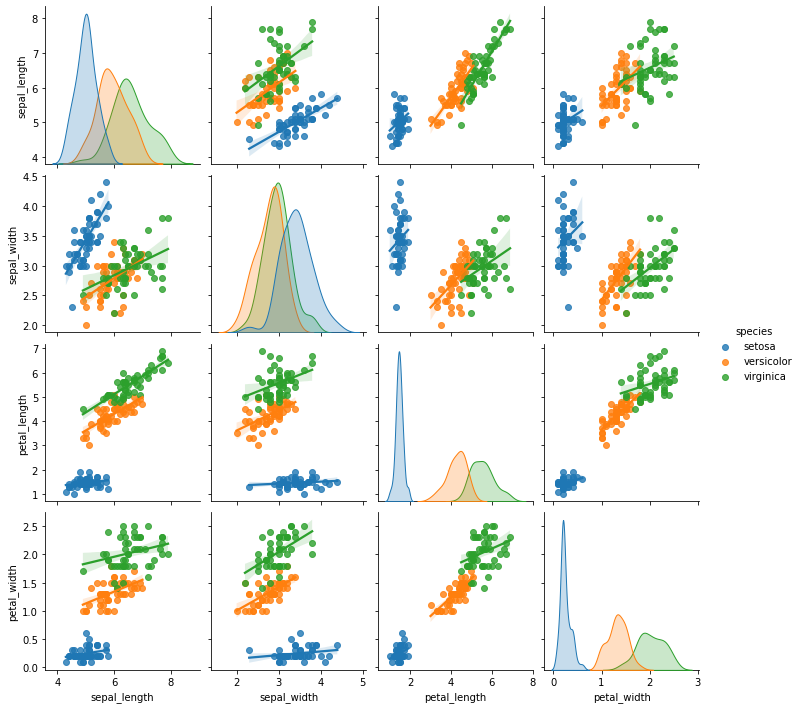

In [6]:
sns.pairplot(iris, hue='species', kind='reg')

It is clearly visible from the above graphs that the `Setosa` flowers can be classified very easily. While it could be little difficult to classify `Virginica` and `Versicolor` flowers.

## Split Datasets

In [37]:
X, y = iris.iloc[:, :-1].values, iris['species'].values

In [40]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (150, 4)
y shape: (150,)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


## Model Building

In [43]:
random_forest_clf = RandomForestClassifier(n_estimators = 1500, max_depth = 5)

In [44]:
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1500)

## Prediction using a Model

### On Custom Inputs

In [45]:
random_forest_clf.predict([[6.0, 2.6, 4, 0.3]])

array(['versicolor'], dtype=object)

In [46]:
random_forest_clf.predict([[6.0, 2.6, 2, 0.3]])

array(['setosa'], dtype=object)

In [47]:
random_forest_clf.predict([[7.0, 2.6, 6, 4]])

array(['virginica'], dtype=object)

### On Test Set

In [48]:
y_pred = random_forest_clf.predict(X_test)

In [49]:
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [51]:
y_true = y_test

In [52]:
y_true

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

## Model Evaluation

In [53]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [54]:
accuracy = round(accuracy_score(y_true, y_pred) * 100, 2)
precision = round(precision_score(y_true, y_pred, average='micro') * 100, 2)
recall = round(recall_score(y_true, y_pred, average='micro') * 100, 2)
f1_score = round(f1_score(y_true, y_pred, average='micro') * 100, 2)
conf_mat = confusion_matrix(y_true, y_pred)

In [55]:
print(f'Accuracy: {accuracy}%')
print(f'Precision: {precision}%')
print(f'Recall: {recall}%')
print(f'F1 Score: {f1_score}%')

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1 Score: 100.0%


In [56]:
print(conf_mat)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
